# A Tutorial of Implementing FDM for BVP

## The Boundary Value Problem
As a first example, we consider the following 2-point boundary value problem (BVP)
$$ u''(x) = f(x), \,\,\text{for}\,\, 0 < x < 1, $$
with the given boundary conditions:
$$ u(0) = \alpha,\,\, u(1) = \beta.$$

### The very first step

The goal is to compute the function $u(x)$ by computer.  Generally, in computing science, a function is described as a grid function.

For 1D, we need compute the function on grid points $x_0, x_1, \ldots, x_m, x_{m+1}$, where $x_j = jh$ and $h = 1/(m+1)$ is the _mesh size_.  For convenice, we denote $U_j$ is the numerical approximation to the solution $u(x_j)$.

* a function to generate the grid

In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg as slinalg

import matplotlib.pyplot as plt

In [6]:
m = 19
x = np.linspace(0, 1, m+2)
def generate_grid(left, right, m):
    h = (right - left)/(m+1)
    x = np.empty(m+2)
    for j in range(m+2):
        x[j] = j*h
    return x, h

x, h = generate_grid(0, 1, 9)
print (x)
print (h)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
0.1


* plot a function $f(x) = \sin(2\pi x)$ with $0 \leq x \leq 1$

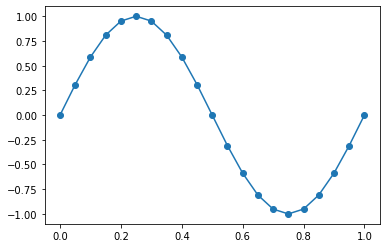

In [10]:
m = 19
x, h = generate_grid(0, 1, m)
#print (x)
f = np.sin(2*np.pi*x)
#print (f)

plt.plot(x, f, 'o-')

## A simple finite difference method

### Boundary conditions 
The boundary conditions are 
$$ u(0) = \alpha,\,\, u(1) = \beta,$$
therefore, we know that 
$$U_0 = \alpha, \,\, U_{m+1} = \beta.$$

### Finite difference scheme
We need to replace $u''(x)$ in the BVP by the centered difference approximation
$$ D^2 U_j = \frac{1}{h^2}\left(U_{j-1} - 2U_j + U_{j+1}\right).$$
Then, we obtain a system of linear equations 
$$ \frac{1}{h^2}\left(U_{j-1} - 2U_j + U_{j+1}\right) = f(x_j) = f_j \quad\text{for}\,\, j = 1, \ldots, m.$$

WE can rewrite it in the matrix form 
$$AU = F,$$
where $U$ is the vector of unknowns $U = [U_1, U_2, \ldots, U_m]^T$ and 
$$
A  = \frac{1}{h^2}\left[\begin{array}{cccccc}
        -2 & 1 & & & & \\
        1 & -2 & 1 &&&\\
        & 1 & -2 & 1 && \\
        & & \ddots & \ddots & \ddots & \\
        & & & 1 & -2 & 1 \\
        & & & & 1 & -2 \end{array}\right],
        \quad
F  = \left[\begin{array}{c} f_1 - \frac{\alpha}{h^2} \\ f_2 \\ f_3 \\ \vdots \\ f_{m-1} \\ f_m - \frac{\beta}{h^2}\end{array}\right].
$$

* generate the matrix $A$

In [21]:
def generate_A(h, m):
    #A = -2*np.eye(m, m) + np.eye(m, m, -1) + np.eye(m, m, 1)
    A = np.zeros([m,m])
    for i in range(m):
        if (i == 0):
            A[i,i] = -2
            A[i,i+1] = 1
        elif (i == m-1):
            A[i,i-1] = 1
            A[i,i] = -2
        else:
            A[i,i-1] =1
            A[i,i] = -2
            A[i,i+1] = 1
    return A/h**2


* The right-hand side vector $F$

In [15]:
def generate_F(h, m, x, alpha, beta, fun):
    F = np.empty(m)
    for i in range(m):
        if (i == 0):
            F[i] = fun(x[i]) - alpha/h**2
        elif (i == m-1):
            F[i] = fun(x[i]) - beta/h**2
        else:
            F[i] = fun(x[i])
    return F

def fun0(x):
    return x

m = 9
x, h = generate_grid(0, 1, m)
print (x, h)

F = generate_F(h, m, x[1:m+1], 1, 1, fun0)
print (F)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] 0.1
[-99.9   0.2   0.3   0.4   0.5   0.6   0.7   0.8 -99.1]


* put every thing together to solve an example problem with: 
$$ f(x) = \sin(\pi x),\,\, \alpha = 0,\,\, \beta = 0.$$


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[[-200.  100.    0.    0.    0.    0.    0.    0.    0.]
 [ 100. -200.  100.    0.    0.    0.    0.    0.    0.]
 [   0.  100. -200.  100.    0.    0.    0.    0.    0.]
 [   0.    0.  100. -200.  100.    0.    0.    0.    0.]
 [   0.    0.    0.  100. -200.  100.    0.    0.    0.]
 [   0.    0.    0.    0.  100. -200.  100.    0.    0.]
 [   0.    0.    0.    0.    0.  100. -200.  100.    0.]
 [   0.    0.    0.    0.    0.    0.  100. -200.  100.]
 [   0.    0.    0.    0.    0.    0.    0.  100. -200.]]
[0.30901699 0.58778525 0.80901699 0.95105652 1.         0.95105652
 0.80901699 0.58778525 0.30901699]
solution:  [ 0.         -0.03156876 -0.06004735 -0.08264808 -0.09715865 -0.10215865
 -0.09715865 -0.08264808 -0.06004735 -0.03156876  0.        ]


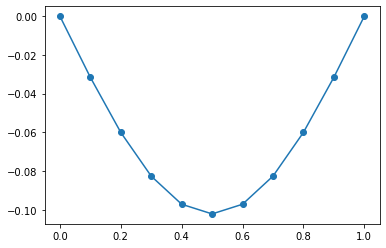

In [26]:
def fun(x):
    return np.sin(np.pi*x)

m = 9
x, h = generate_grid(0, 1, m)
print (x)
A = generate_A(h, m)
print (A)
F = generate_F(h, 9, x[1:m+1], 0, 0, fun)
print (F)
U = np.empty(np.size(x))
U[0] = 0; U[m+1] = 0
U[1:m+1] = np.linalg.solve(A, F)
print ("solution: ", U)

plt.plot(x, U, 'o-')

exact:  [-0.00000000e+00 -3.13099676e-02 -5.95550975e-02 -8.19705595e-02
 -9.63621719e-02 -1.01321184e-01 -9.63621719e-02 -8.19705595e-02
 -5.95550975e-02 -3.13099676e-02 -1.24082663e-17]


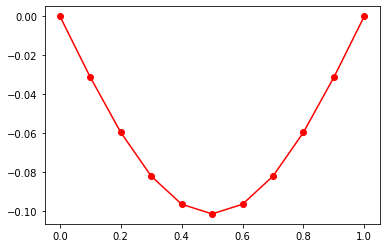

In [27]:
def exact_fun(x):
    return -1/np.pi**2*np.sin(np.pi*x)

def exact_U(x, exact_fun):
    exact_U = np.empty(np.size(x))
    for i in range(np.size(x)):
        exact_U[i] = exact_fun(x[i])
    return exact_U

U_hat = exact_U(x, exact_fun)
print ("exact: ", U_hat)

plt.plot(x, U_hat, 'ro-')

In [28]:
error = U - U_hat
print (error)
print ("Max norm: ", np.max(np.abs(error)))

[ 0.00000000e+00 -2.58789938e-04 -4.92247713e-04 -6.77520853e-04
 -7.96473531e-04 -8.37461830e-04 -7.96473531e-04 -6.77520853e-04
 -4.92247713e-04 -2.58789938e-04  1.24082663e-17]
Max norm:  0.0008374618303157583


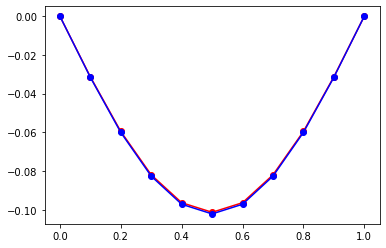

In [29]:
plt.plot(x, U_hat, 'ro-')
plt.plot(x, U, 'bo-')

* Rewrite the process as a FDM solver

max norm error: 8.37e-04


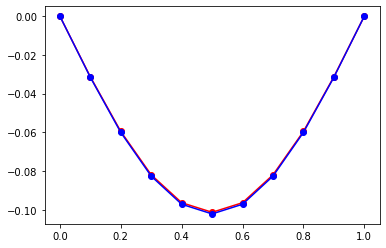

In [31]:
def FDM_BVP(m, left, right, alpha, beta , fun, exact_fun):
    # generate the grid
    x, h = generate_grid(0, 1, m)

    #
    U = np.empty(np.size(x))
    U[0] = 0; U[m+1] = 0
    
    #
    A = generate_A(h, m)
    F = generate_F(h, 9, x[1:m+1], 0, 0, fun)

    U[1:m+1] = np.linalg.solve(A, F)
    
    U_hat = exact_U(x, exact_fun)
    error = U - U_hat
    return np.max(np.abs(error)), x, U, U_hat 

erri, x, U, U_hat = FDM_BVP(9, 0, 1, 0, 0, fun, exact_fun)

print ("max norm error: %7.2e" % erri)

plt.plot(x, U_hat, 'ro-')
plt.plot(x, U, 'bo-')